# Amplification by Shuffling

In [1]:
import longitudinal
import test

# Above are the modules constructed for this project
# longitudinal contains the client and server, as well as some methods for vector manipulation specific to this domain
# test contains an instance which encapsulates the entire environment, including running and stats, and some test suites

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make an instance to test with
rep = 20
n = 1024*128
d = 32
k = 4
eps = 100
instance = test.Instance(n, d, k, eps)

# Make a matrix with all the results in it
x = np.arange(0, d, dtype=int)
Y = np.array([instance.run(True, False) for i in range(rep)])
Y_norm = np.array([test.normalize(Y[i]) for i in range(rep)])

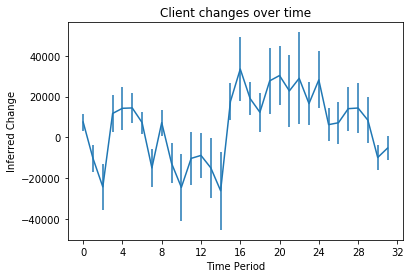

In [3]:
# Plot what the server saw
plt.errorbar(x, np.mean(Y, axis=0), yerr=(np.std(Y, axis=0)))
plt.xticks(np.arange(0, d+1, int(d/8)))
plt.xlabel('Time Period')
plt.ylabel('Inferred Change')
plt.title('Client changes over time')
plt.show()

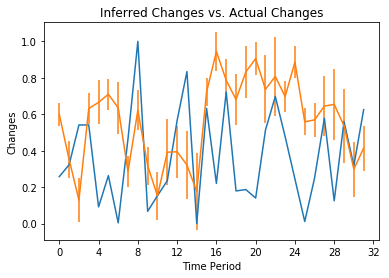

In [4]:
# Compare (normalized) against reality
plt.plot(x, test.normalize(instance.f_true))
plt.errorbar(x, np.mean(Y_norm, axis=0), yerr=(np.std(Y_norm, axis=0)))
plt.xticks(np.arange(0, d+1, int(d/8)))
plt.xlabel('Time Period')
plt.ylabel('Changes')
plt.title('Inferred Changes vs. Actual Changes')
plt.show()